# TMDrefined Preds for arithmetic mean with threshold = 2

In [1]:
#imports
import numpy as np
import pandas as pd
import os
import glob
import scripts.ML_TMDrefined as ml_ref
import scripts.Translate_TMDrefined as t_ref
import scripts.StandardConfig as stdc

In [2]:
# get all the files
path, path_module, sep = stdc.find_folderpath()
path_labels = f"{path}{sep}test_train_N{sep}"
list_df_analysis_tags = glob.glob(f"{path_labels}*.xlsx")
list_df_analysis_tags

['/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_test.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_train.xlsx']

## N-term Pred with threshold 2 for arithmetic mean

In [3]:
test_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_test.xlsx').set_index("ID")
train_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/test_train_N/N2_train.xlsx').set_index("ID")
top60n1 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/N_out_refinement/CPP_top60_n=1/norm_top_of_60.xlsx').set_index("AA")

In [4]:
top60n1.head(15)

,ARGP820103,BUNA790103,BURA740102,CHAM820102,CHAM830102,CHAM830103,CHAM830105,CHOP780101,CHOP780204,CHOP780206,...,KARS160110,KARS160112,KARS160118,KARS160119,KARS160120,KARS160122,LINS030105,LINS030109,KOEH090110,KOEH090112
AA,,,,,,,,,,,,,,,,,,,,,
A,0.504,0.691,0.264,0.262,0.182,0.0,0.000,0.174,0.425,0.298,...,0.863,0.697,0.429,0.205,0.952,0.000,0.111,0.149,0.140,0.345
C,0.387,0.819,1.000,0.947,0.442,0.5,0.000,0.661,0.110,0.256,...,0.557,0.697,1.000,0.863,0.952,0.500,0.000,0.000,0.285,1.000
D,0.000,0.745,0.213,0.601,0.397,0.5,0.000,0.908,0.790,0.529,...,0.293,0.473,0.566,0.889,0.952,0.247,0.200,0.809,0.919,0.440
E,0.032,0.745,0.186,0.561,0.017,0.5,0.667,0.248,1.000,0.579,...,0.396,0.311,0.544,0.893,0.952,0.152,0.400,0.894,0.913,0.681
F,0.670,1.000,0.354,0.462,0.354,0.5,0.667,0.119,0.085,0.488,...,0.208,0.139,0.429,0.821,0.952,0.169,0.133,0.000,0.029,0.017
G,0.170,0.596,0.336,0.240,0.470,0.0,0.000,1.000,0.160,0.884,...,0.863,0.393,0.000,0.000,0.952,0.000,0.133,0.298,0.221,0.112
H,0.053,0.851,0.000,0.313,0.514,0.5,0.667,0.440,0.145,0.727,...,0.355,0.213,0.206,0.708,0.562,0.134,0.400,0.489,0.651,0.267
I,0.543,0.745,0.634,0.424,0.633,1.0,0.000,0.000,0.115,0.364,...,0.033,0.163,0.429,0.733,0.583,0.281,0.044,0.000,0.029,0.276
K,0.004,0.691,0.195,0.313,0.376,0.5,0.667,0.495,0.110,0.554,...,0.433,0.312,0.458,0.647,0.912,0.114,1.000,1.000,1.000,0.405


In [5]:
train_am_N2

,window_left,window_right,label,start_pos_TMD,norm_intersect_pos
ID,,,,,
INAR2_HUMAN__0,ESAK,IGGI,1,244,0.473786
INAR2_HUMAN__-1,AESA,KIGG,1,243,0.471845
INAR2_HUMAN__1,SAKI,GGII,0,245,0.475728
INAR2_HUMAN__-2,SAES,AKIG,0,242,0.469903
INAR2_HUMAN__2,AKIG,GIIT,0,246,0.477670
...,...,...,...,...,...
KLOTB_HUMAN__-1,VQKK,PLIF,0,996,0.954023
KLOTB_HUMAN__1,KKPL,IFLG,0,998,0.955939
KLOTB_HUMAN__-2,LVQK,KPLI,0,995,0.953065


In [6]:
test_am_N2

,window_left,window_right,label,start_pos_TMD,norm_intersect_pos
ID,,,,,
TRML1_MOUSE__2,IPLI,WGAV,0,178,0.561514
SIM28_HUMAN__3,PFLC,ILLP,0,55,0.361842
LRRC4_MOUSE__3,KIII,GCFV,0,530,0.812883
PTPRM_HUMAN__1,TVKI,AGVI,0,744,0.512397
TMIG3_MOUSE__1,GSRM,SILI,0,152,0.727273
...,...,...,...,...,...
SEM4C_HUMAN__-1,LENL,GLVW,0,663,0.795918
CD34_HUMAN__-3,QSYS,QKTL,0,288,0.748052
RELL2_HUMAN__0,PQHG,LYML,1,15,0.049505


In [7]:
columns_60_1 = top60n1.columns.tolist()

In [8]:
aaontology_colors = {'ASA/Volume': [54,128,180], 
                     'Polarity': [253,220,34], 
                     'Structure-Activity': [140,94,86], 
                     'Composition': [255,146,50],
                     'Others': [127,127,127], 
                     'Shape': [55,192,206], 
                     'Conformation': [61,159,71],
                     'Energy': [213,65,65]
                    }

In [9]:
aaontology_colors_hex = {'ASA/Volume': "#3680b4", 
                         'Polarity': "#fddc22", 
                         'Structure-Activity': "#8c5e56", 
                         'Composition': "#ff9232",
                         'Others': "#7f7f7f", 
                         'Shape': "#37c0ce", 
                         'Conformation': "#3d9f47",
                         'Energy': "#d54141"
                        }

In [10]:
trainN2_scale_df, train_N2_label_df = t_ref.aa_numeric_by_scale(feature_df=train_am_N2[["window_left", "window_right"]], label_df=train_am_N2["label"], scale_df_filter=columns_60_1, mode="weighted")
trainN2_scale_df

Begin process aa_numeric_by_scale:  09:47:04
End process aa_numeric_by_scale:  09:50:06
Process time: 182.14 seconds


,ARGP820103,BUNA790103,BURA740102,CHAM820102,CHAM830102,CHAM830103,CHAM830105,CHOP780101,CHOP780204,CHOP780206,...,KARS160110,KARS160112,KARS160118,KARS160119,KARS160120,KARS160122,LINS030105,LINS030109,KOEH090110,KOEH090112
ID,,,,,,,,,,,,,,,,,,,,,
INAR2_HUMAN__0,-0.083694,0.013320,-0.105890,-0.001479,-0.116978,-0.071950,0.166390,-0.013726,0.114561,-0.009802,...,0.110738,0.106420,0.137316,0.083363,0.085865,0.014723,0.183647,0.241311,0.241256,0.115089
INAR2_HUMAN__-1,0.057045,0.018118,-0.033069,0.005535,-0.105985,-0.085817,-0.032738,-0.099374,0.166798,-0.049405,...,0.135706,0.145148,0.121558,0.020963,0.051407,0.025255,-0.094957,-0.022887,-0.024120,0.085500
INAR2_HUMAN__1,0.004302,0.023864,-0.026562,0.002853,-0.034584,0.062949,0.081741,-0.114628,0.022956,-0.067518,...,-0.001746,0.061508,0.144088,0.118039,0.011975,0.048528,0.112267,0.102042,0.111154,0.078319
INAR2_HUMAN__-2,-0.035373,0.009925,0.002406,0.009890,-0.008150,0.019171,0.000000,0.086146,0.098319,0.115654,...,0.117256,0.085071,0.108093,0.075922,0.043854,0.099725,-0.051830,0.073427,0.054243,0.071682
INAR2_HUMAN__2,-0.034994,-0.009777,-0.074881,-0.016553,-0.062022,-0.147598,0.070408,0.026082,0.009428,-0.010475,...,0.093046,0.001411,0.012828,-0.055160,0.124996,-0.065038,0.079865,0.081381,0.092068,0.013617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KLOTB_HUMAN__-1,-0.227474,0.071384,-0.060813,0.020358,0.035033,0.071950,0.192052,0.015583,-0.070452,-0.011911,...,0.081855,-0.061102,0.017117,-0.017963,0.027864,-0.136804,0.158068,0.310355,0.267817,0.079162
KLOTB_HUMAN__1,-0.105894,-0.121894,-0.053241,-0.059500,-0.056334,-0.091187,0.051911,0.113201,0.078308,0.008721,...,0.023890,0.132707,0.046488,0.037539,0.049048,0.093941,0.271385,0.212247,0.241239,0.086031
KLOTB_HUMAN__-2,-0.035543,0.078768,0.022176,0.044756,0.025882,0.066646,0.081741,-0.058889,-0.051091,-0.038668,...,0.024758,-0.025632,0.010539,0.015593,0.034988,-0.080324,-0.065835,0.059345,0.025249,0.025442


In [11]:
train_N2_label_df

ID
INAR2_HUMAN__0     1
INAR2_HUMAN__-1    1
INAR2_HUMAN__1     0
INAR2_HUMAN__-2    0
INAR2_HUMAN__2     0
                  ..
KLOTB_HUMAN__-1    0
KLOTB_HUMAN__1     0
KLOTB_HUMAN__-2    0
KLOTB_HUMAN__2     0
KLOTB_HUMAN__3     0
Name: label, Length: 14983, dtype: int64

In [12]:
testN2_scale_df, test_N2_label_df = t_ref.aa_numeric_by_scale(feature_df=test_am_N2[["window_left", "window_right"]], label_df=test_am_N2["label"], scale_df_filter=columns_60_1, mode="weighted")
testN2_scale_df

Begin process aa_numeric_by_scale:  09:50:06
End process aa_numeric_by_scale:  09:50:10
Process time: 3.66 seconds


,ARGP820103,BUNA790103,BURA740102,CHAM820102,CHAM830102,CHAM830103,CHAM830105,CHOP780101,CHOP780204,CHOP780206,...,KARS160110,KARS160112,KARS160118,KARS160119,KARS160120,KARS160122,LINS030105,LINS030109,KOEH090110,KOEH090112
ID,,,,,,,,,,,,,,,,,,,,,
TRML1_MOUSE__2,0.120691,0.053909,0.108710,-0.012587,-0.029144,0.138596,-0.154642,-0.098028,-0.032040,0.001031,...,-0.159454,0.011540,0.061389,0.114655,-0.099474,0.133700,0.032621,-0.047529,-0.019398,0.053004
SIM28_HUMAN__3,-0.057798,0.044061,0.030526,0.080772,-0.020353,-0.077321,0.070408,0.103168,0.000810,-0.009629,...,0.079977,0.038877,0.088301,0.028654,0.057063,0.024366,0.000163,-0.002217,0.042650,0.086415
LRRC4_MOUSE__3,0.030112,-0.018065,-0.034733,-0.044961,0.018898,0.221288,-0.007164,-0.203930,-0.000809,-0.059882,...,-0.200992,-0.149299,-0.000885,0.083296,-0.145028,-0.008161,0.070700,0.046744,0.026548,-0.036026
PTPRM_HUMAN__1,-0.039913,0.018950,0.033395,0.023473,0.050354,0.215918,0.081741,-0.046128,-0.034629,-0.005962,...,-0.153173,-0.027555,0.046362,0.156959,-0.117244,0.078190,0.123293,0.101296,0.099257,0.031780
TMIG3_MOUSE__1,-0.049870,-0.122334,-0.051169,-0.046721,-0.091277,-0.156094,0.184888,0.112290,-0.003701,-0.026196,...,0.110490,-0.014050,-0.019904,-0.026782,0.080209,-0.035893,0.060382,0.099988,0.146190,-0.016313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEM4C_HUMAN__-1,0.039191,0.093323,-0.047735,0.029353,-0.106875,0.024541,-0.024410,-0.037576,0.054568,0.029595,...,-0.062599,0.010498,0.096508,0.130038,-0.004551,0.010653,0.014070,0.121925,0.104450,0.080592
CD34_HUMAN__-3,-0.045585,0.002553,0.041211,0.044813,0.077593,-0.052780,-0.039902,0.158014,-0.023492,0.132473,...,0.160692,-0.002956,0.066157,-0.027672,0.078924,0.045879,-0.107822,-0.047937,-0.042261,0.000290
RELL2_HUMAN__0,-0.308210,0.002823,-0.157763,-0.161417,0.065726,-0.124730,0.000000,0.233905,0.111694,0.107544,...,0.106123,0.006267,-0.125456,-0.153839,-0.021324,0.023258,0.119734,0.170462,0.175764,0.008383


In [13]:
test_N2_label_df

ID
TRML1_MOUSE__2     0
SIM28_HUMAN__3     0
LRRC4_MOUSE__3     0
PTPRM_HUMAN__1     0
TMIG3_MOUSE__1     0
                  ..
SEM4C_HUMAN__-1    0
CD34_HUMAN__-3     0
RELL2_HUMAN__0     1
PTPRV_MOUSE__0     1
MXRA8_HUMAN__-1    0
Name: label, Length: 282, dtype: int64

In [14]:
# now the BIG algorithm, get all the treeeeeez

Begin process make_forest:  09:50:10
given parameters: {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['entropy'], 'max_depth': [26], 'max_leaf_nodes': [200], 'max_samples': [0.3], 'n_estimators': [730], 'n_jobs': [-1], 'verbose': [0]} with HalvingGridSearchCV gave following best-performing parameter combi:best params: {'bootstrap': True, 'ccp_alpha': 0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 26, 'max_leaf_nodes': 200, 'max_samples': 0.3, 'n_estimators': 730, 'n_jobs': -1, 'verbose': 0}
End process make_forest:  09:50:38
Process time: 27.9 seconds


/home/freiherr/PycharmProjects/TMDrefined/scripts/ML_TMDrefined.py:155: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scale_labels, rotation=45, ha="right", fontweight="bold")


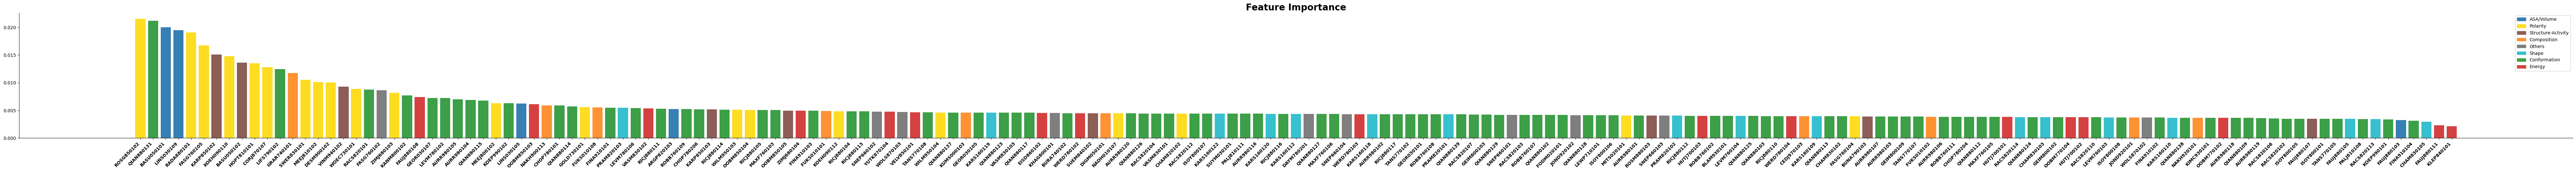

In [15]:
#best_params= {'bootstrap': [True], 'class_weight': ['balanced'], 'criterion': ['gini'], 'max_depth': [15], 'max_leaf_nodes': [20], 'n_estimators': [340], 'n_jobs': [6]}
#param_grid = {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['gini'], 'max_depth': [10], 'max_leaf_nodes': [80], 'max_samples': [0.6], 'n_estimators': [300], 'n_jobs': [-1], 'verbose': [0]}
param_grid = {'bootstrap': [True], 'ccp_alpha': [0], 'class_weight': ['balanced_subsample'], 'criterion': ['entropy'], 'max_depth': [26], 'max_leaf_nodes': [200], 'max_samples': [0.3], 'n_estimators': [730], 'n_jobs': [-1], 'verbose': [0]}
AM_N2_forest = ml_ref.ForestTMDrefind.make_forest(trainN2_scale_df, train_N2_label_df, job_name="am_N2_filter_top60_n1(4)", n_jobs=-1, param_grid=param_grid)
AM_N2_forest.fetch_a_tree()
AM_N2_forest.hyperparameter_summary(save_table=True)
AM_N2_forest.feature_importance()

In [16]:
test_labels_pred = AM_N2_forest.predict_labels(testN2_scale_df) 
test_labels_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

Accuracy: 0.8581560283687943
Precision: 0.575
Recall: 0.8846153846153846
F1:  0.696969696969697


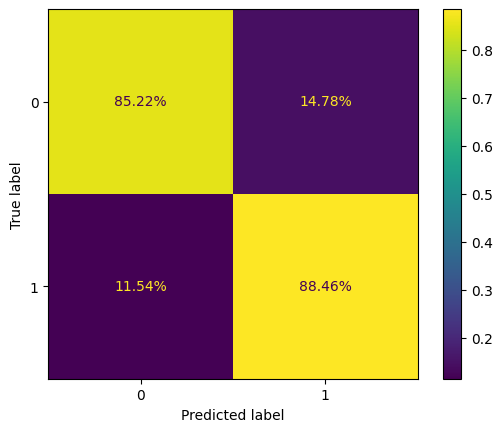

In [17]:
AM_N2_forest.test_predict_quality(label_test=test_N2_label_df, label_pred=test_labels_pred, cm_save=True)

In [18]:
# P05067, APP, 701
seq = "MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMDAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN"

Begin process aa_numeric_by_scale:  09:50:44
End process aa_numeric_by_scale:  09:50:45
Process time: 0.41 seconds


['APP', 707]

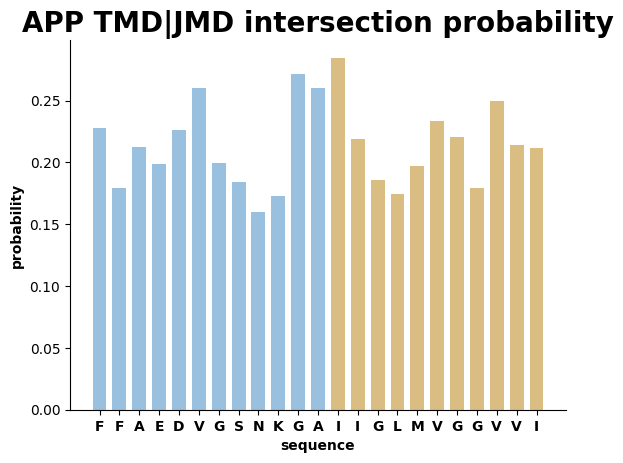

In [19]:
AM_N2_forest.pred_from_seq("APP", seq, 701, rounds=100)

Begin process aa_numeric_by_scale:  09:50:52
End process aa_numeric_by_scale:  09:50:52
Process time: 0.47 seconds


['BCAM', 549]

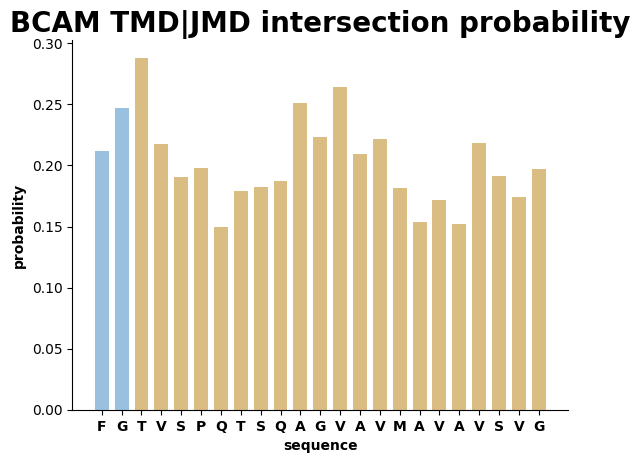

In [20]:
seq = "MEPPDAPAQARGAPRLLLLAVLLAAHPDAQAEVRLSVPPLVEVMRGKSVILDCTPTGTHDHYMLEWFLTDRSGARPRLASAEMQGSELQVTMHDTRGRSPPYQLDSQGRLVLAEAQVGDERDYVCVVRAGAAGTAEATARLNVFAKPEATEVSPNKGTLSVMEDSAQEIATCNSRNGNPAPKITWYRNGQRLEVPVEMNPEGYMTSRTVREASGLLSLTSTLYLRLRKDDRDASFHCAAHYSLPEGRHGRLDSPTFHLTLHYPTEHVQFWVGSPSTPAGWVREGDTVQLLCRGDGSPSPEYTLFRLQDEQEEVLNVNLEGNLTLEGVTRGQSGTYGCRVEDYDAADDVQLSKTLELRVAYLDPLELSEGKVLSLPLNSSAVVNCSVHGLPTPALRWTKDSTPLGDGPMLSLSSITFDSNGTYVCEASLPTVPVLSRTQNFTLLVQGSPELKTAEIEPKADGSWREGDEVTLICSARGHPDPKLSWSQLGGSPAEPIPGRQGWVSSSLTLKVTSALSRDGISCEASNPHGNKRHVFHFGTVSPQTSQAGVAVMAVAVSVGLLLLVVAVFYCVRRKGGPCCRQRREKGAPPPGEPGLSHSGSEQPEQTGLLMGGASGGARGGSGGFGDEC"
AM_N2_forest.pred_from_seq("BCAM", seq, 548, rounds=100)